In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Px4Vm3w11i0evtzxVIn7")
project = rf.workspace("riceleafdiseasedetection").project("rice-leaf-disease-s1asn")
version = project.version(6)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 3.7 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Rice-Leaf-Disease-6 in yolov8:: 100%|██████████| 4620/4620 [00:00<00:00, 8807.95it/s]


In [2]:
def text_to_file(text,file_path):
    with open(file_path,'w') as file:
        file.write(text)
text = """
names:
- Bacterial Leaf Blight
- Brown-Spot
- Rice-Tungro
- Sheath Blight
nc: 4
roboflow:
  license: CC BY 4.0
  project: rice-leaf-disease-s1asn
  url: https://universe.roboflow.com/riceleafdiseasedetection/rice-leaf-disease-s1asn/dataset/6
  version: 6
  workspace: riceleafdiseasedetection
test: /kaggle/working/Rice-Leaf-Disease-6/test/images
train: /kaggle/working/Rice-Leaf-Disease-6/train/images
val: /kaggle/working/Rice-Leaf-Disease-6/valid/images

"""
text_to_file(text, "data.yaml")

In [3]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5933.9/8062.4 GB disk)


In [4]:
!yolo task= segment mode= train data=/kaggle/working/data.yaml model=yolov8n-seg.pt epochs=25 imgsz=640

100%|███████████████████████████████████████| 6.74M/6.74M [00:00<00:00, 123MB/s]
Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/kaggle/working/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, sav

In [5]:
from IPython.display import Image, display

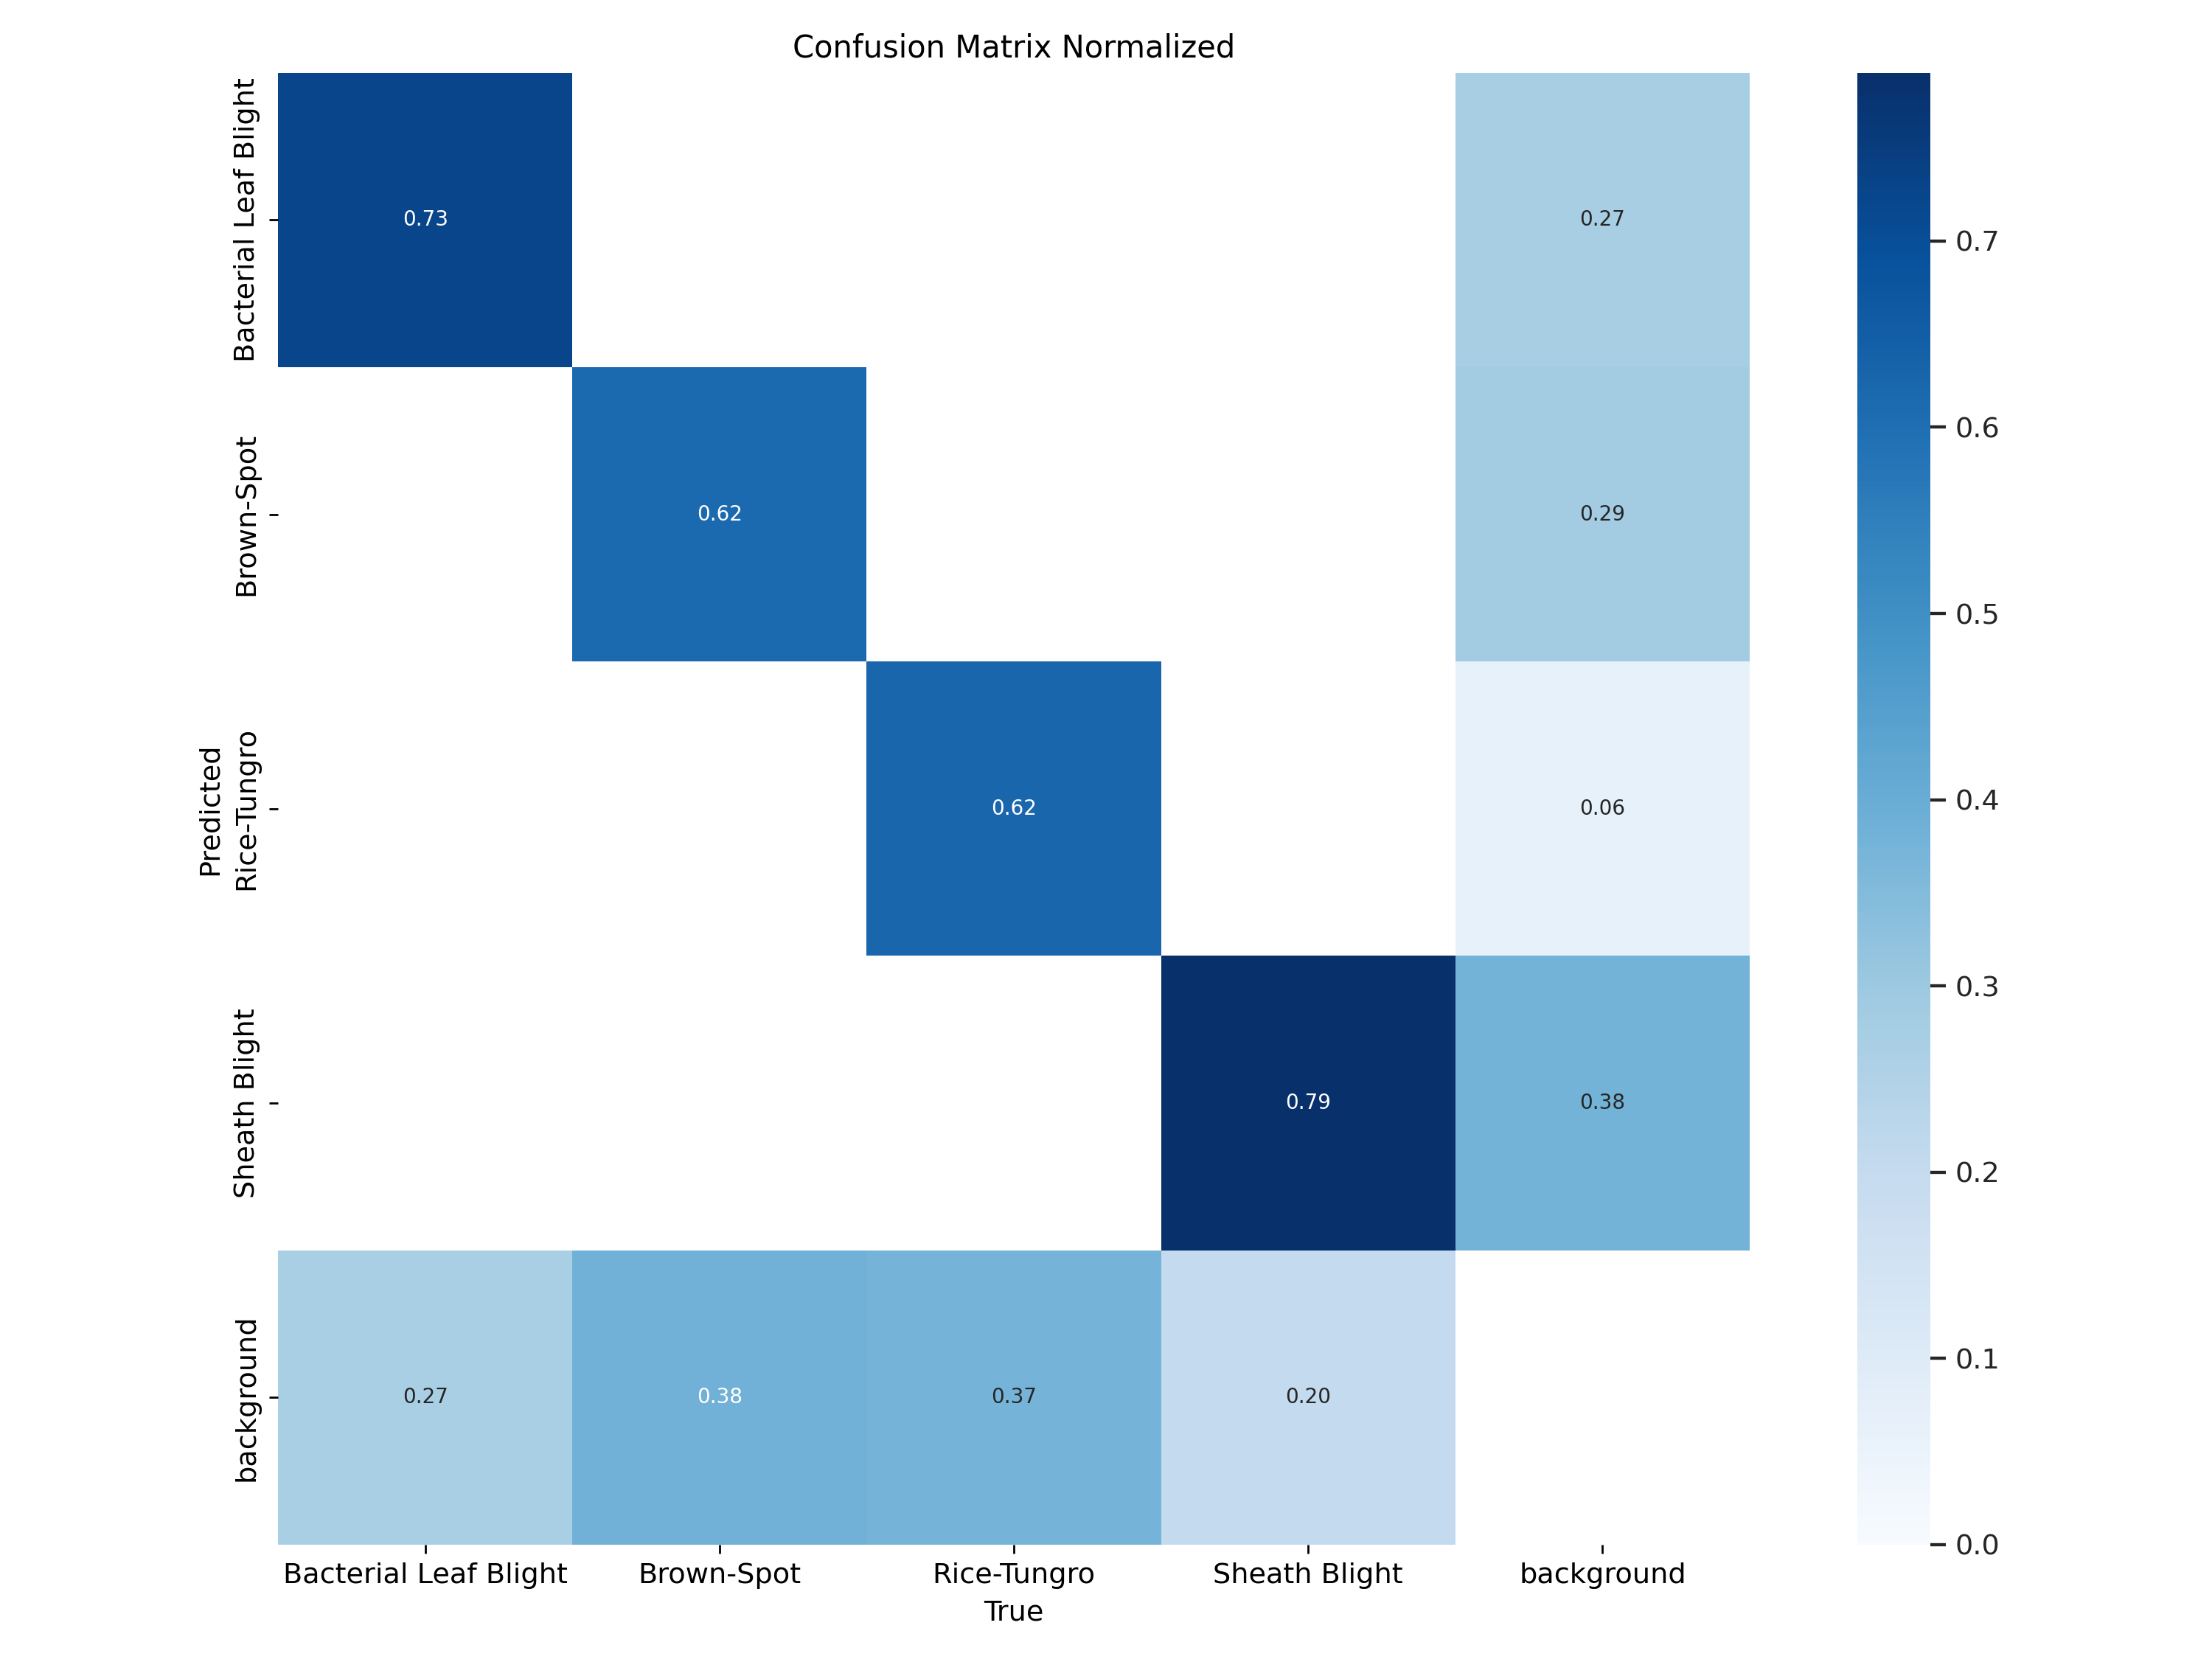

In [6]:
display(Image(filename=f"/kaggle/working/runs/segment/train/confusion_matrix_normalized.png", width=1000))

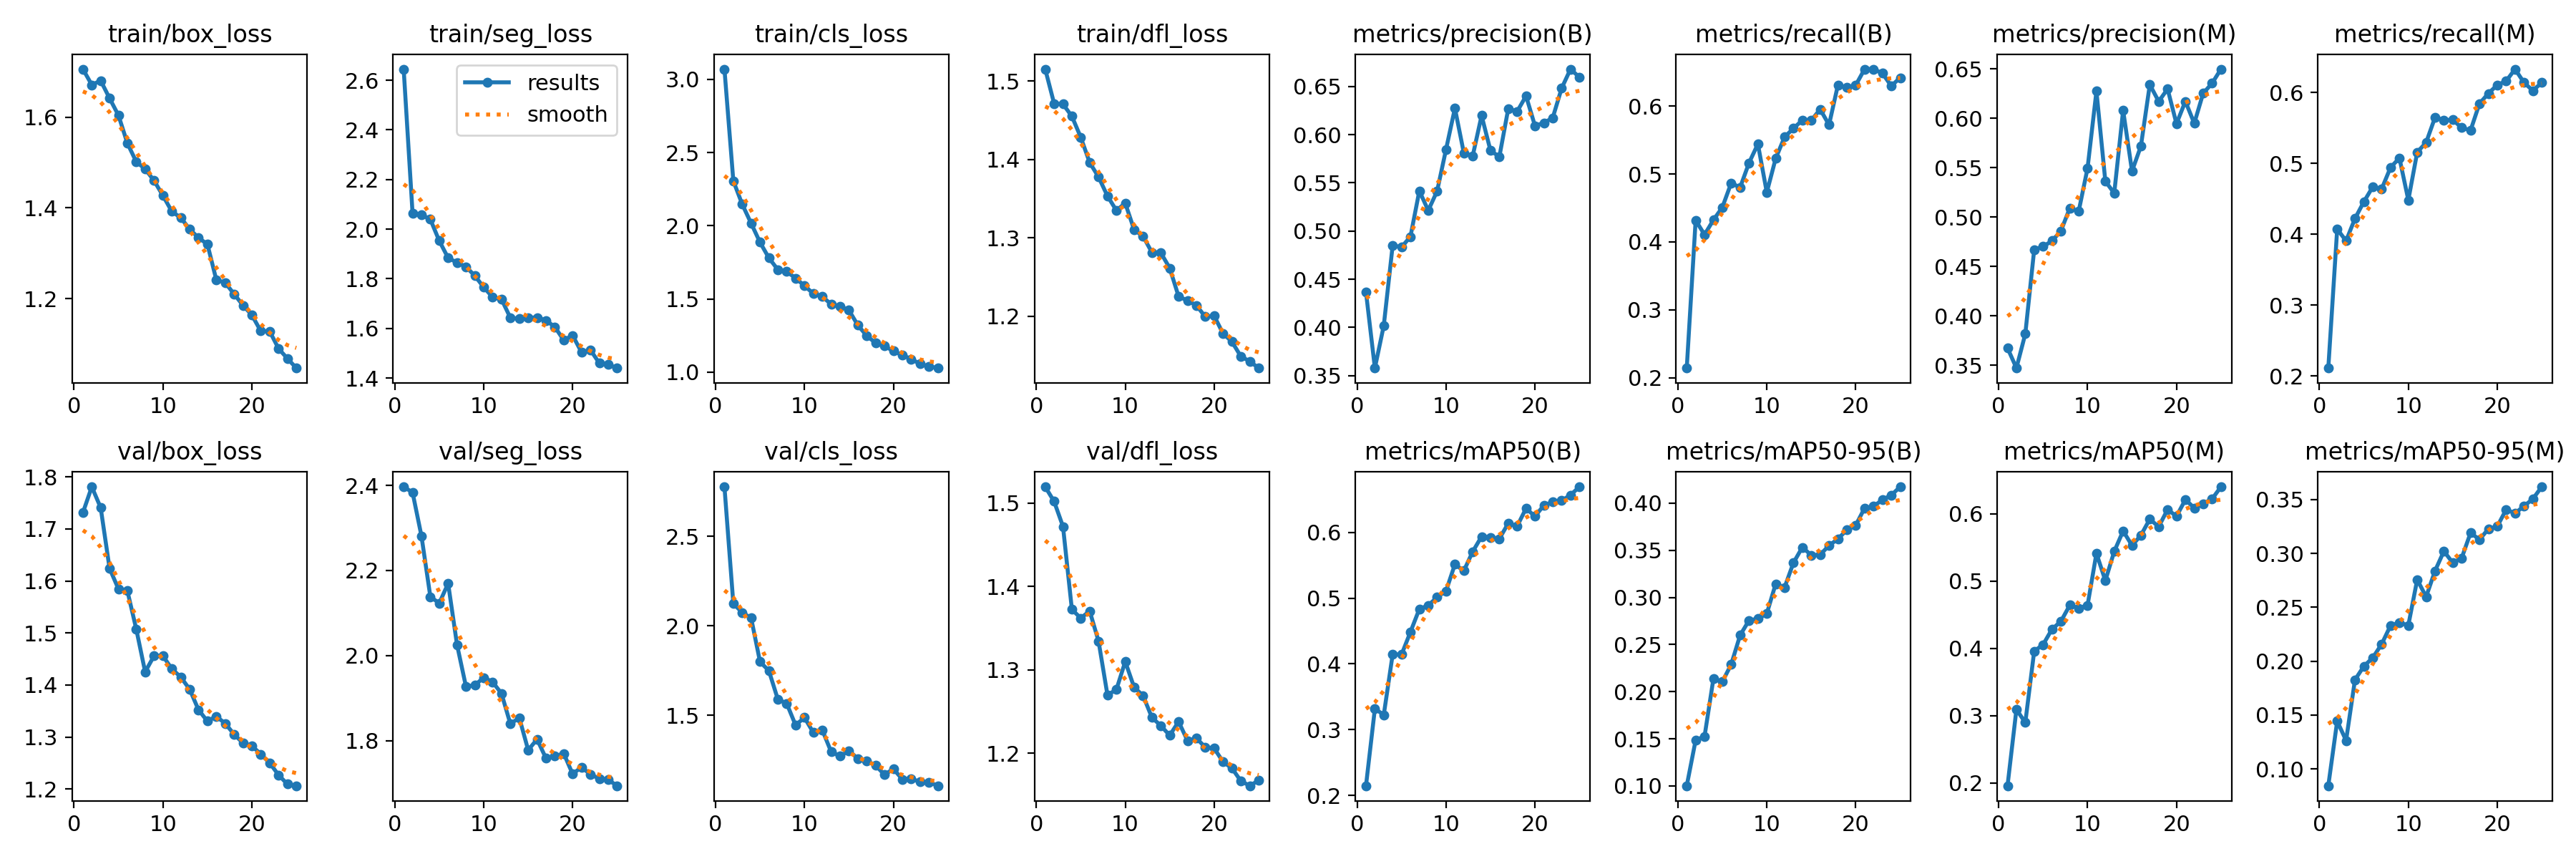

In [7]:
display(Image(filename=f"/kaggle/working/runs/segment/train/results.png", width=1000))

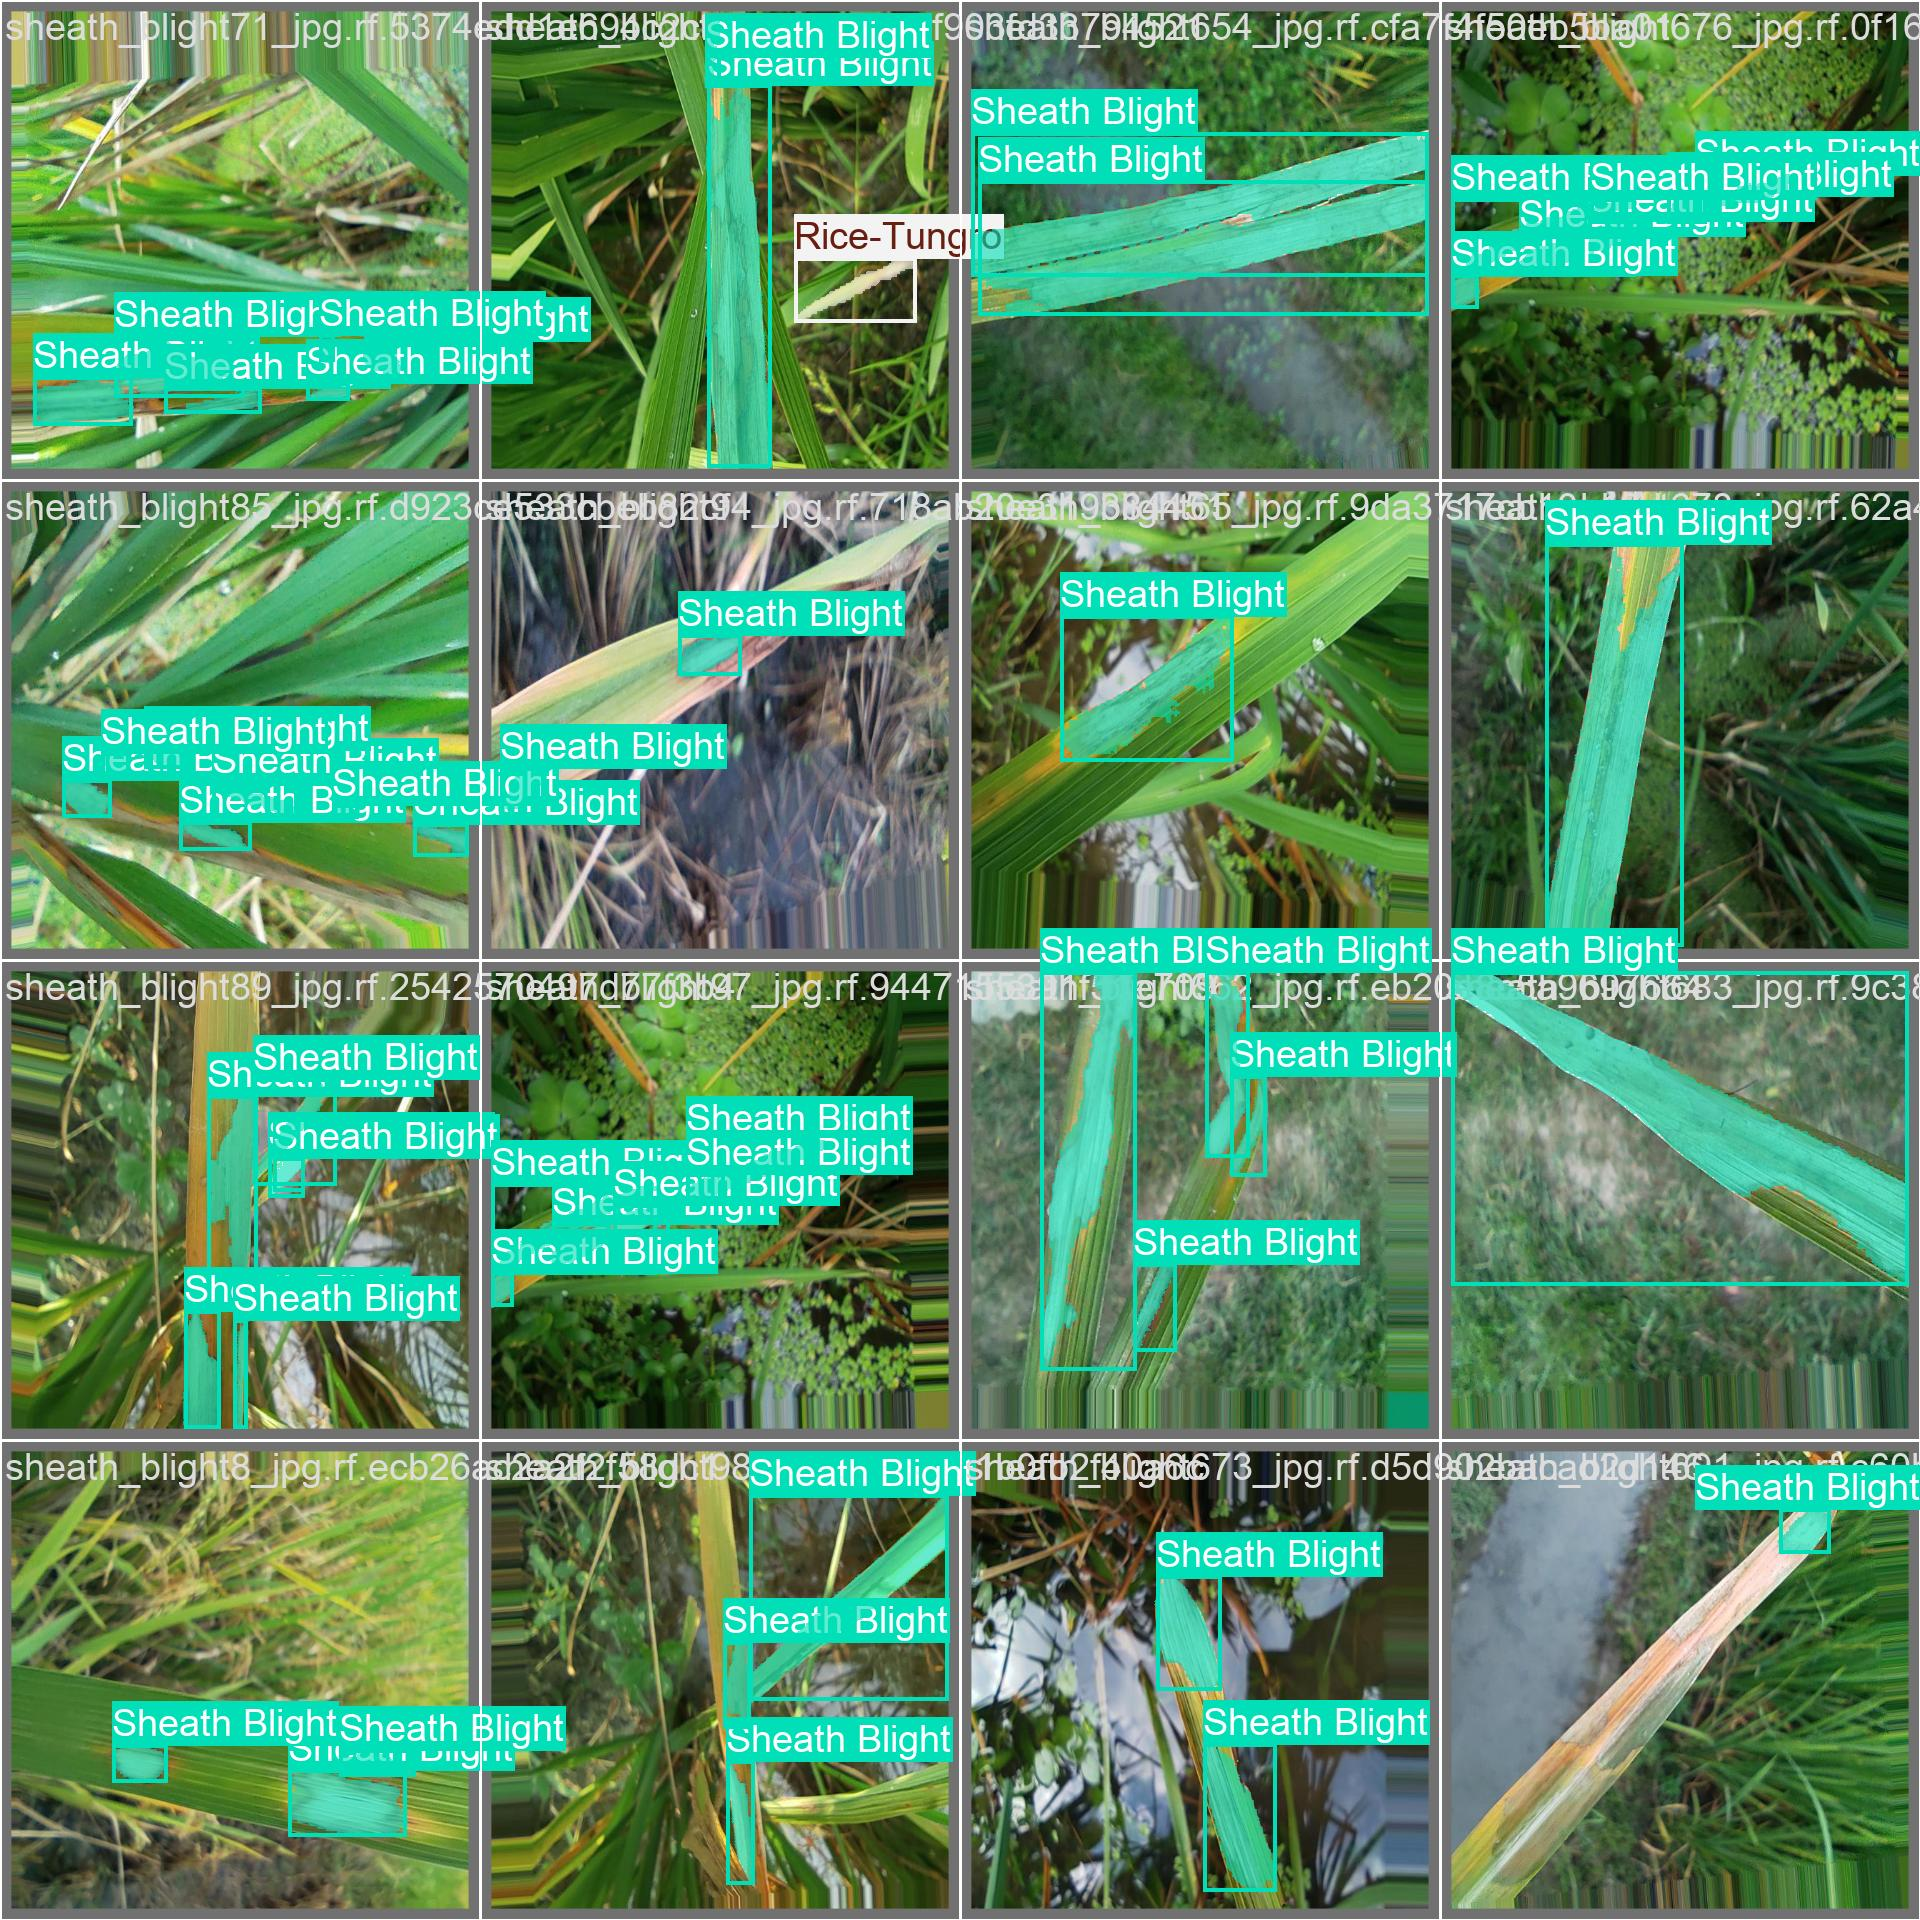

In [8]:
display(Image(filename=f"/kaggle/working/runs/segment/train/val_batch0_labels.jpg", width=1000))

In [9]:
!yolo task=segment mode=predict model=/kaggle/working/runs/segment/train/weights/best.pt imgsz=640 conf=0.5 source=/kaggle/working/Rice-Leaf-Disease-6/test/images

Ultralytics 8.3.39 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,258,844 parameters, 0 gradients, 12.0 GFLOPs

image 1/222 /kaggle/working/Rice-Leaf-Disease-6/test/images/bacterial_leaf_blight108_jpg.rf.fb168bec600baf6fff714f07ddcb60e4.jpg: 640x640 1 Bacterial Leaf Blight, 8.4ms
image 2/222 /kaggle/working/Rice-Leaf-Disease-6/test/images/bacterial_leaf_blight111_jpg.rf.eb16add3ae47d371c48dfffd76a9754a.jpg: 640x640 3 Bacterial Leaf Blights, 6.9ms
image 3/222 /kaggle/working/Rice-Leaf-Disease-6/test/images/bacterial_leaf_blight113_jpg.rf.b678484c75e6cae139c5771a8edc83c0.jpg: 640x640 3 Bacterial Leaf Blights, 7.0ms
image 4/222 /kaggle/working/Rice-Leaf-Disease-6/test/images/bacterial_leaf_blight11_jpg.rf.eea47e62afb4187483be7be640c1b09a.jpg: 640x640 2 Bacterial Leaf Blights, 6.2ms
image 5/222 /kaggle/working/Rice-Leaf-Disease-6/test/images/bacterial_leaf_blight126_jpg.rf.f09e01b105e2e21be6adaa0155bc8ab0.jpg: 640x640 1 Bacte

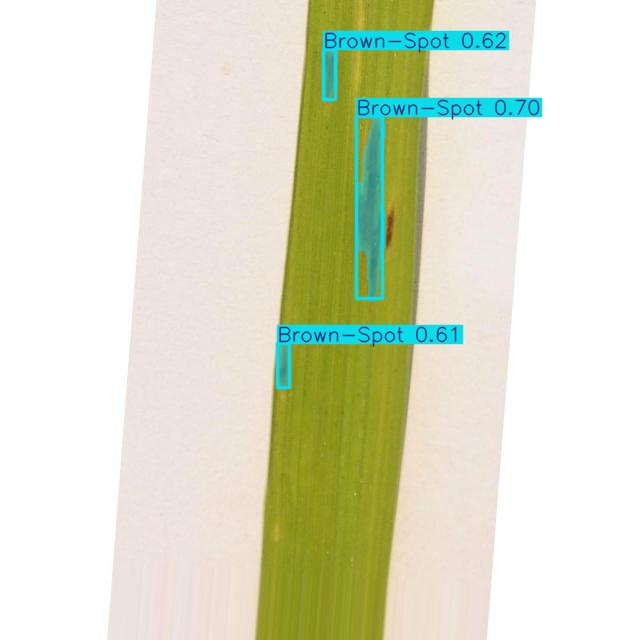

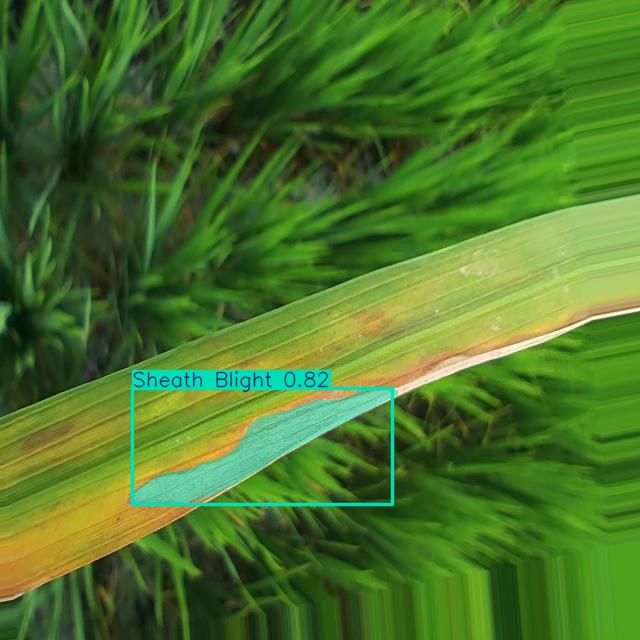

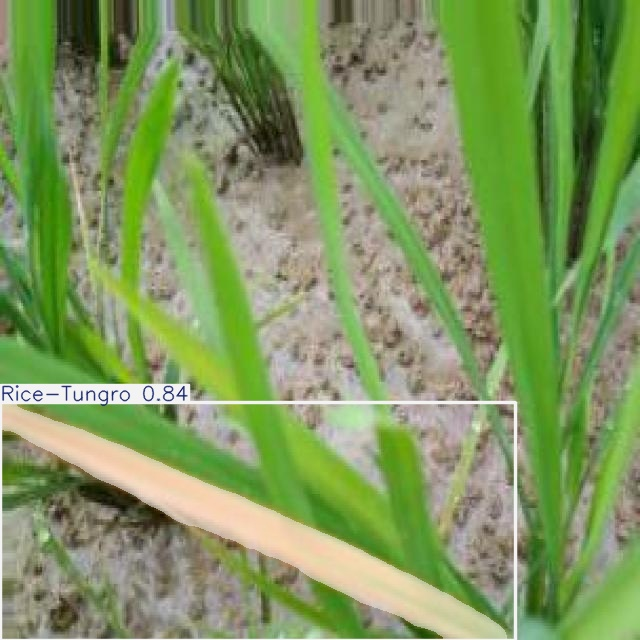

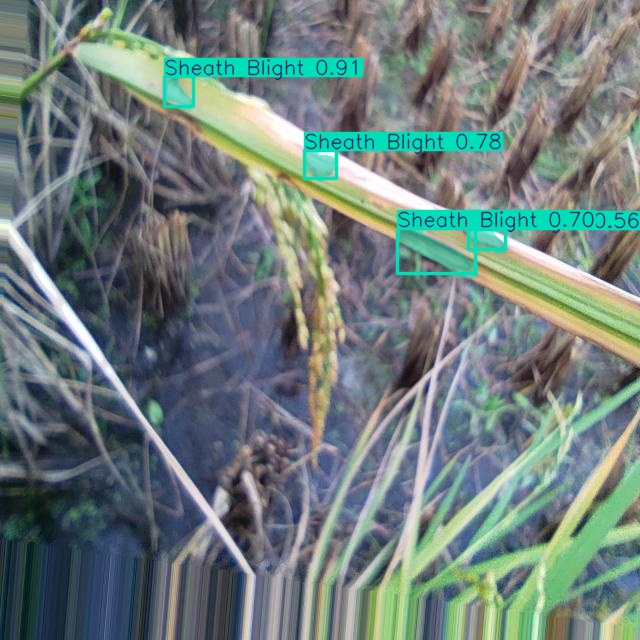

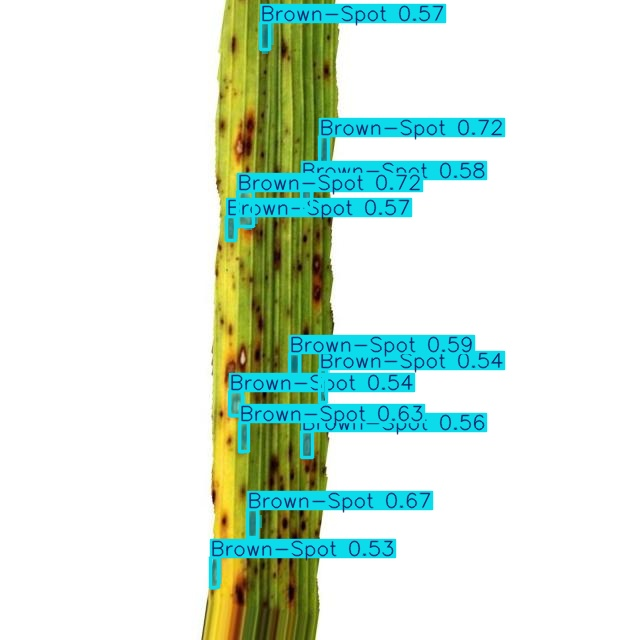

In [10]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob("/kaggle/working/runs/segment/predict/*.jpg")[:5]: #assuming JPG

    print("\n")
    display(Image(filename=imageName))
